In [70]:
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('../data/processed/sp500full.csv', index_col='Date', parse_dates=True)

In [72]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,22.453505,22.625179,22.267525,22.389128,20.545469,3815561.0,A
2010-01-05,22.324751,22.331903,22.002861,22.145924,20.322289,4186031.0,A
2010-01-06,22.067240,22.174536,22.002861,22.067240,20.250088,3243779.0,A
2010-01-07,22.017166,22.045780,21.816881,22.038628,20.223829,3095172.0,A
2010-01-08,21.917025,22.067240,21.745352,22.031473,20.217272,3733918.0,A


In [73]:
itub = df[df['Name'] == 'GOOGL'][['Close']]

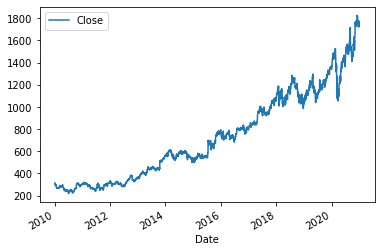

In [74]:
itub.plot();

In [75]:
Ntest = 30
train = itub.iloc[:-Ntest]
test = itub.iloc[-Ntest:]

In [113]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6940.651, Time=4.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6978.341, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6938.309, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6941.182, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6979.970, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6938.166, Time=0.80 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6939.227, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6939.878, Time=5.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6938.786, Time=2.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6902.794, Time=4.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6939.406, Time=5.98 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6932.092, Time=12.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6938.917, Time=2.07 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6902.738, Time=24.07 sec
 ARIMA(5,1,2)(0,0,0)[0] interce

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2738
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -11060.096
Date:                Sun, 21 Feb 2021   AIC                          22136.192
Time:                        11:30:56   BIC                          22183.509
Sample:                             0   HQIC                         22153.291
                               - 2738                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0431      0.015      2.836      0.005       0.013       0.073
ar.L1         -0.7961      0.015    -54.605      0.000      -0.825      -0.767
ar.L2          0.8177      0.016     50.928      0.000       0.786       0.849
ar.L3          0.8925      0.013     68.591      0.000       0.867       0.918
ma.L1          0.7278      0.017     41.742      0.000       0.694       0.762
ma.L2         -0.8619      0.014    -60.207      0.000      -0.890      -0.834
ma.L3         -0.8266      0.016    -52.781      0.000      -0.857      -0.796
sigma2       189.1872      1.947     97.169      0.000     185.371     193.003
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             21598.84
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              18.28   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (5, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [116]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(fulldata.index, fulldata, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
    ax.legend();

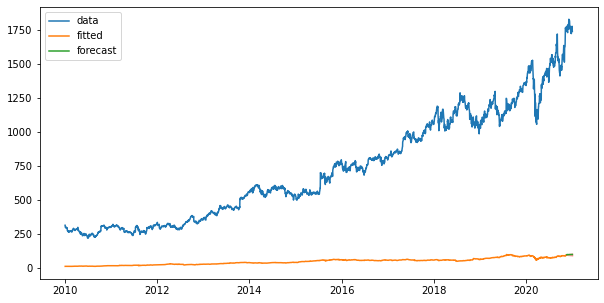

In [117]:
plot_result(model, itub, train, test)

In [118]:
def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
    ax.legend();

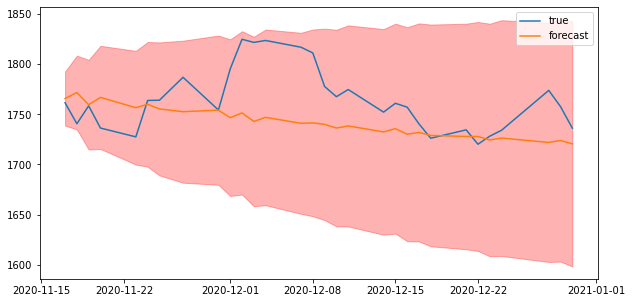

In [82]:
plot_test(model, test)

In [119]:
def rmse(y, t):
    return np.sqrt(np.mean((t - y)**2))

In [120]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [121]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    3.854784
dtype: float64
RSME Naive: Close    4.343226
dtype: float64


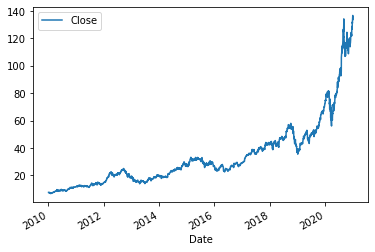

In [88]:
aapl = df[df['Name'] == 'AAPL'][['Close']]
aapl.plot();

In [89]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [90]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.71 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=9359.482, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8227.818, Time=0.51 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9357.482, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=7917.959, Time=0.66 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=7735.776, Time=0.73 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=7540.037, Time=0.86 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7505.464, Time=1.52 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.37 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.21 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=7503.467, Time=0.83 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=7538.040, Time=0.46 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.34 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.76 s

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2738
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -3745.733
Date:                Sun, 21 Feb 2021   AIC                           7503.467
Time:                        11:36:18   BIC                           7538.952
Sample:                             0   HQIC                          7516.291
                               - 2738                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9553      0.007   -137.331      0.000      -0.969      -0.942
ar.L2         -0.7198      0.009    -80.339      0.000      -0.737      -0.702
ar.L3         -0.5582      0.008    -67.226      0.000      -0.574      -0.542
ar.L4         -0.3714      0.008    -43.834      0.000      -0.388      -0.355
ar.L5         -0.1157      0.007    -16.909      0.000      -0.129      -0.102
sigma2         0.9046      0.006    148.041      0.000       0.893       0.917
===================================================================================
Ljung-Box (L1) (Q):                   1.87   Jarque-Bera (JB):            121165.54
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):              26.42   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

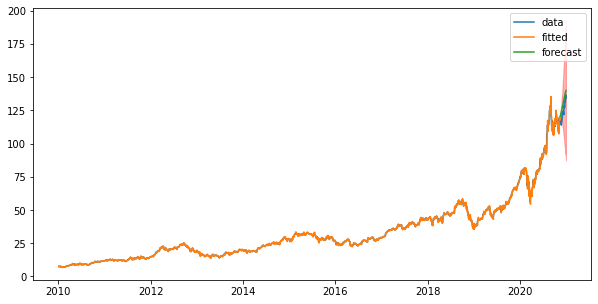

In [92]:
plot_result(model, aapl, train, test)

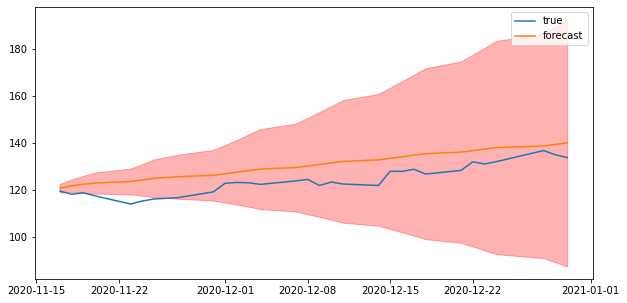

In [93]:
plot_test(model, test)

In [94]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [95]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    6.766643
dtype: float64
RSME Naive: Close    7.122837
dtype: float64


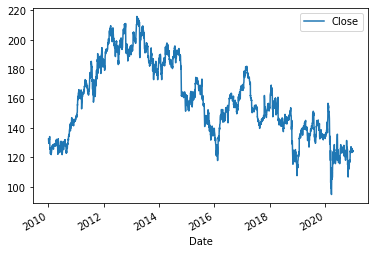

In [96]:
ibm = df[df['Name'] == 'IBM'][['Close']]
ibm.plot();

In [97]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [98]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11851.290, Time=4.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11850.516, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11851.153, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11851.210, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11848.532, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.187 seconds


In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2738
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -3439.040
Date:                Sun, 21 Feb 2021   AIC                           6898.079
Time:                        11:50:10   BIC                           6957.225
Sample:                             0   HQIC                          6919.453
                               - 2738                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0248      0.013      1.966      0.049    7.21e-05       0.050
ar.L1          0.5406      0.032     16.783      0.000       0.477       0.604
ar.L2          0.5523      0.026     21.419      0.000       0.502       0.603
ar.L3         -0.7717      0.025    -30.476      0.000      -0.821      -0.722
ar.L4         -0.1994      0.008    -25.939      0.000      -0.214      -0.184
ar.L5          0.0733      0.008      8.704      0.000       0.057       0.090
ma.L1         -0.6503      0.033    -19.754      0.000      -0.715      -0.586
ma.L2         -0.4590      0.028    -16.228      0.000      -0.514      -0.404
ma.L3          0.8499      0.026     32.252      0.000       0.798       0.902
sigma2         0.7202      0.007    108.611      0.000       0.707       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             49914.39
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.42   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

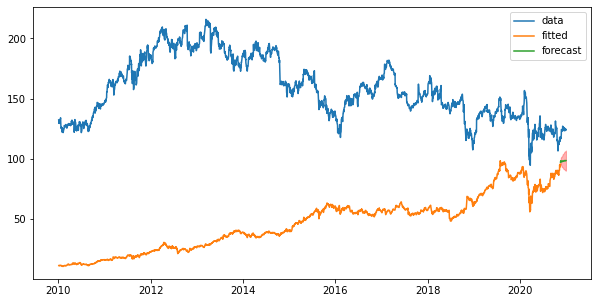

In [112]:
plot_result(model, ibm, train, test)

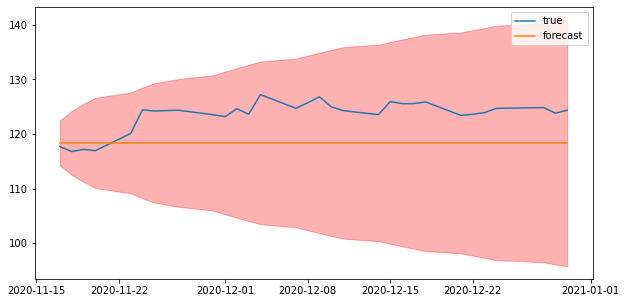

In [101]:
plot_test(model, test)

In [102]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [103]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    5.855603
dtype: float64
RSME Naive: Close    5.855603
dtype: float64


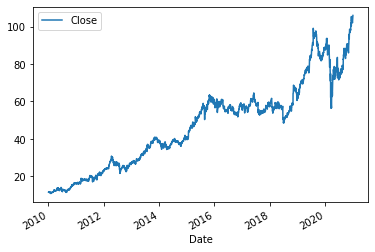

In [104]:
sbux = df[df['Name'] == 'SBUX'][['Close']]
sbux.plot();

In [105]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [106]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6940.651, Time=5.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6978.341, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6938.309, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6941.182, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6979.970, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6938.166, Time=1.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6939.227, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6939.878, Time=6.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6938.786, Time=1.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6902.794, Time=5.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6939.406, Time=8.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6932.092, Time=13.75 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6938.917, Time=1.65 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6902.738, Time=17.55 sec
 ARIMA(5,1,2)(0,0,0)[0] interce

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2738
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -3439.040
Date:                Sun, 21 Feb 2021   AIC                           6898.079
Time:                        11:46:36   BIC                           6957.225
Sample:                             0   HQIC                          6919.453
                               - 2738                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0248      0.013      1.966      0.049    7.21e-05       0.050
ar.L1          0.5406      0.032     16.783      0.000       0.477       0.604
ar.L2          0.5523      0.026     21.419      0.000       0.502       0.603
ar.L3         -0.7717      0.025    -30.476      0.000      -0.821      -0.722
ar.L4         -0.1994      0.008    -25.939      0.000      -0.214      -0.184
ar.L5          0.0733      0.008      8.704      0.000       0.057       0.090
ma.L1         -0.6503      0.033    -19.754      0.000      -0.715      -0.586
ma.L2         -0.4590      0.028    -16.228      0.000      -0.514      -0.404
ma.L3          0.8499      0.026     32.252      0.000       0.798       0.902
sigma2         0.7202      0.007    108.611      0.000       0.707       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             49914.39
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.42   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

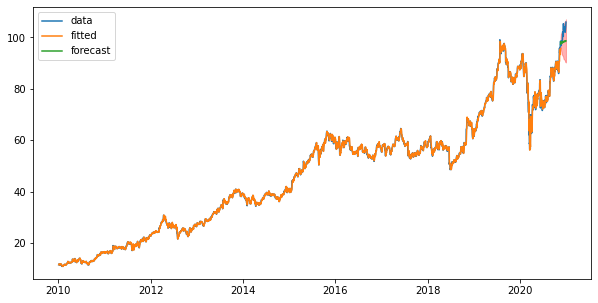

In [122]:
plot_result(model, sbux, train, test)

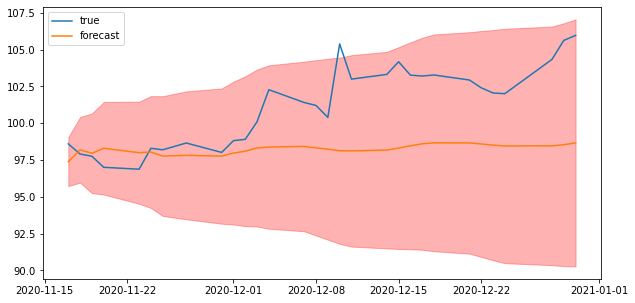

In [123]:
plot_test(model, test)

In [124]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [125]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    3.854784
dtype: float64
RSME Naive: Close    4.343226
dtype: float64
